# SQL

-- SELECT *
-- FROM 'Cross_percent.csv'

-- SELECT *
-- FROM 'Cross_values.csv'

# Python

In [1]:
import pandas as pd
cross_values_df = pd.read_csv('Cross_values.csv')
cross_percent_df = pd.read_csv('Cross_percent.csv')

In [2]:
!pip install geopy
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
import json
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
cross_values_df

,TIF_Name,Accommodation,Business,Electronic,Entertainment,Food,Liquor,Medical,Other,Permits,Personal Services,Retail,Special,Tabacco,Vehicles
0,"['105th Street and Vincennes Avenue', '107th/H...",0,1,0,0,15,0,0,0,0,0,0,0,0,0
1,"['105th Street and Vincennes Avenue', 'Roselan...",0,10,0,0,16,0,0,9,0,0,0,0,0,0
2,['105th Street and Vincennes Avenue'],8,1278,4,6,553,0,0,0,158,2,21,227,271,210
3,['107th/Halsted'],0,1007,5,3,505,0,8,0,129,0,33,403,211,202
4,['111th Street/Kedzie Avenue Business District'],0,955,6,20,470,11,0,34,15,42,108,181,84,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,['Western/Ogden'],12,1669,5,28,632,5,0,0,36,0,65,772,120,198
121,"['Wilson Yard', 'Lawrence/Broadway']",0,11,0,0,0,0,0,0,0,0,0,0,0,0
122,['Wilson Yard'],12,1641,20,70,883,0,0,10,56,29,75,354,244,13
123,['Woodlawn'],4,741,3,19,337,1,0,9,74,1,46,158,168,66


In [4]:
tif_geo = gpd.read_file('Boundaries TIF.geojson')[['name', 'geometry']]
tif_geo

,name,geometry
0,116th/Avenue O,"MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ..."
1,Bryn Mawr/Broadway,"MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ..."
2,51st and Lake Park,"MULTIPOLYGON (((-87.58854 41.80155, -87.58902 ..."
3,Lakefront,"MULTIPOLYGON (((-87.59624 41.81693, -87.59676 ..."
4,Madden/Wells,"MULTIPOLYGON (((-87.61454 41.82808, -87.61455 ..."
...,...,...
116,Lincoln Avenue,"MULTIPOLYGON (((-87.71047 41.99673, -87.71047 ..."
117,63rd/Pulaski,"MULTIPOLYGON (((-87.72180 41.76583, -87.72186 ..."
118,Cortland and Chicago River,"MULTIPOLYGON (((-87.66612 41.92000, -87.66603 ..."
119,Canal/Congress,"MULTIPOLYGON (((-87.64485 41.88255, -87.64474 ..."


In [5]:
for column in cross_values_df:
    tif_geo[column] = cross_values_df[column]

tif_geo

,name,geometry,TIF_Name,Accommodation,Business,Electronic,Entertainment,Food,Liquor,Medical,Other,Permits,Personal Services,Retail,Special,Tabacco,Vehicles
0,116th/Avenue O,"MULTIPOLYGON (((-87.53995 41.68459, -87.53995 ...","['105th Street and Vincennes Avenue', '107th/H...",0,1,0,0,15,0,0,0,0,0,0,0,0,0
1,Bryn Mawr/Broadway,"MULTIPOLYGON (((-87.66051 41.98451, -87.66037 ...","['105th Street and Vincennes Avenue', 'Roselan...",0,10,0,0,16,0,0,9,0,0,0,0,0,0
2,51st and Lake Park,"MULTIPOLYGON (((-87.58854 41.80155, -87.58902 ...",['105th Street and Vincennes Avenue'],8,1278,4,6,553,0,0,0,158,2,21,227,271,210
3,Lakefront,"MULTIPOLYGON (((-87.59624 41.81693, -87.59676 ...",['107th/Halsted'],0,1007,5,3,505,0,8,0,129,0,33,403,211,202
4,Madden/Wells,"MULTIPOLYGON (((-87.61454 41.82808, -87.61455 ...",['111th Street/Kedzie Avenue Business District'],0,955,6,20,470,11,0,34,15,42,108,181,84,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Lincoln Avenue,"MULTIPOLYGON (((-87.71047 41.99673, -87.71047 ...",['Western Avenue North'],7,3312,34,69,2335,22,0,76,117,95,317,744,511,288
117,63rd/Pulaski,"MULTIPOLYGON (((-87.72180 41.76583, -87.72186 ...",['Western Avenue South'],0,2608,11,83,1714,27,0,29,51,42,231,751,310,466
118,Cortland and Chicago River,"MULTIPOLYGON (((-87.66612 41.92000, -87.66603 ...","['Western Avenue/Rock Island', '119th Street/I...",0,0,0,0,5,0,0,0,0,0,0,0,0,0
119,Canal/Congress,"MULTIPOLYGON (((-87.64485 41.88255, -87.64474 ...",['Western Avenue/Rock Island'],0,3034,10,51,1200,19,0,2,130,69,141,468,264,270


<AxesSubplot: >

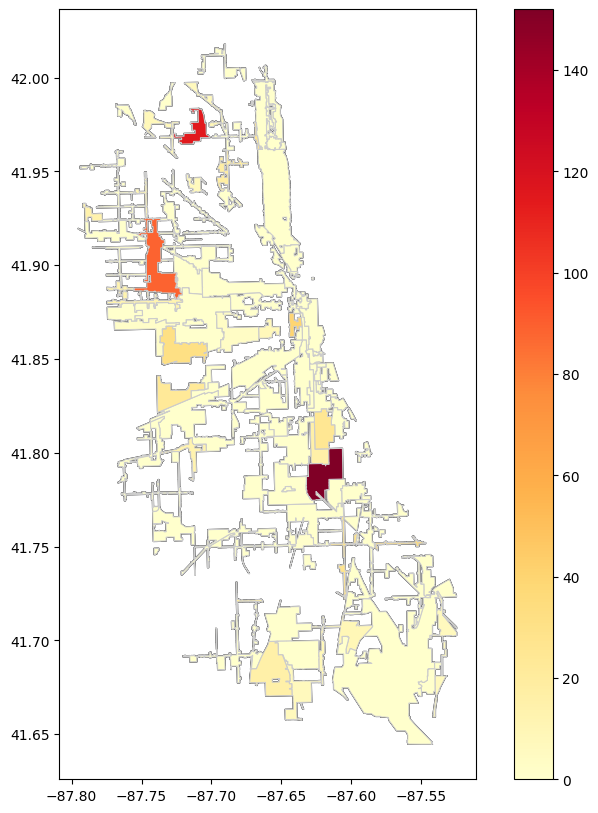

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
tif_geo.plot(ax=ax, color='lightgrey', edgecolor='black')

# Customize the plot to display a heatmap of the number of companies
tif_geo.plot(column='Accommodation', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)





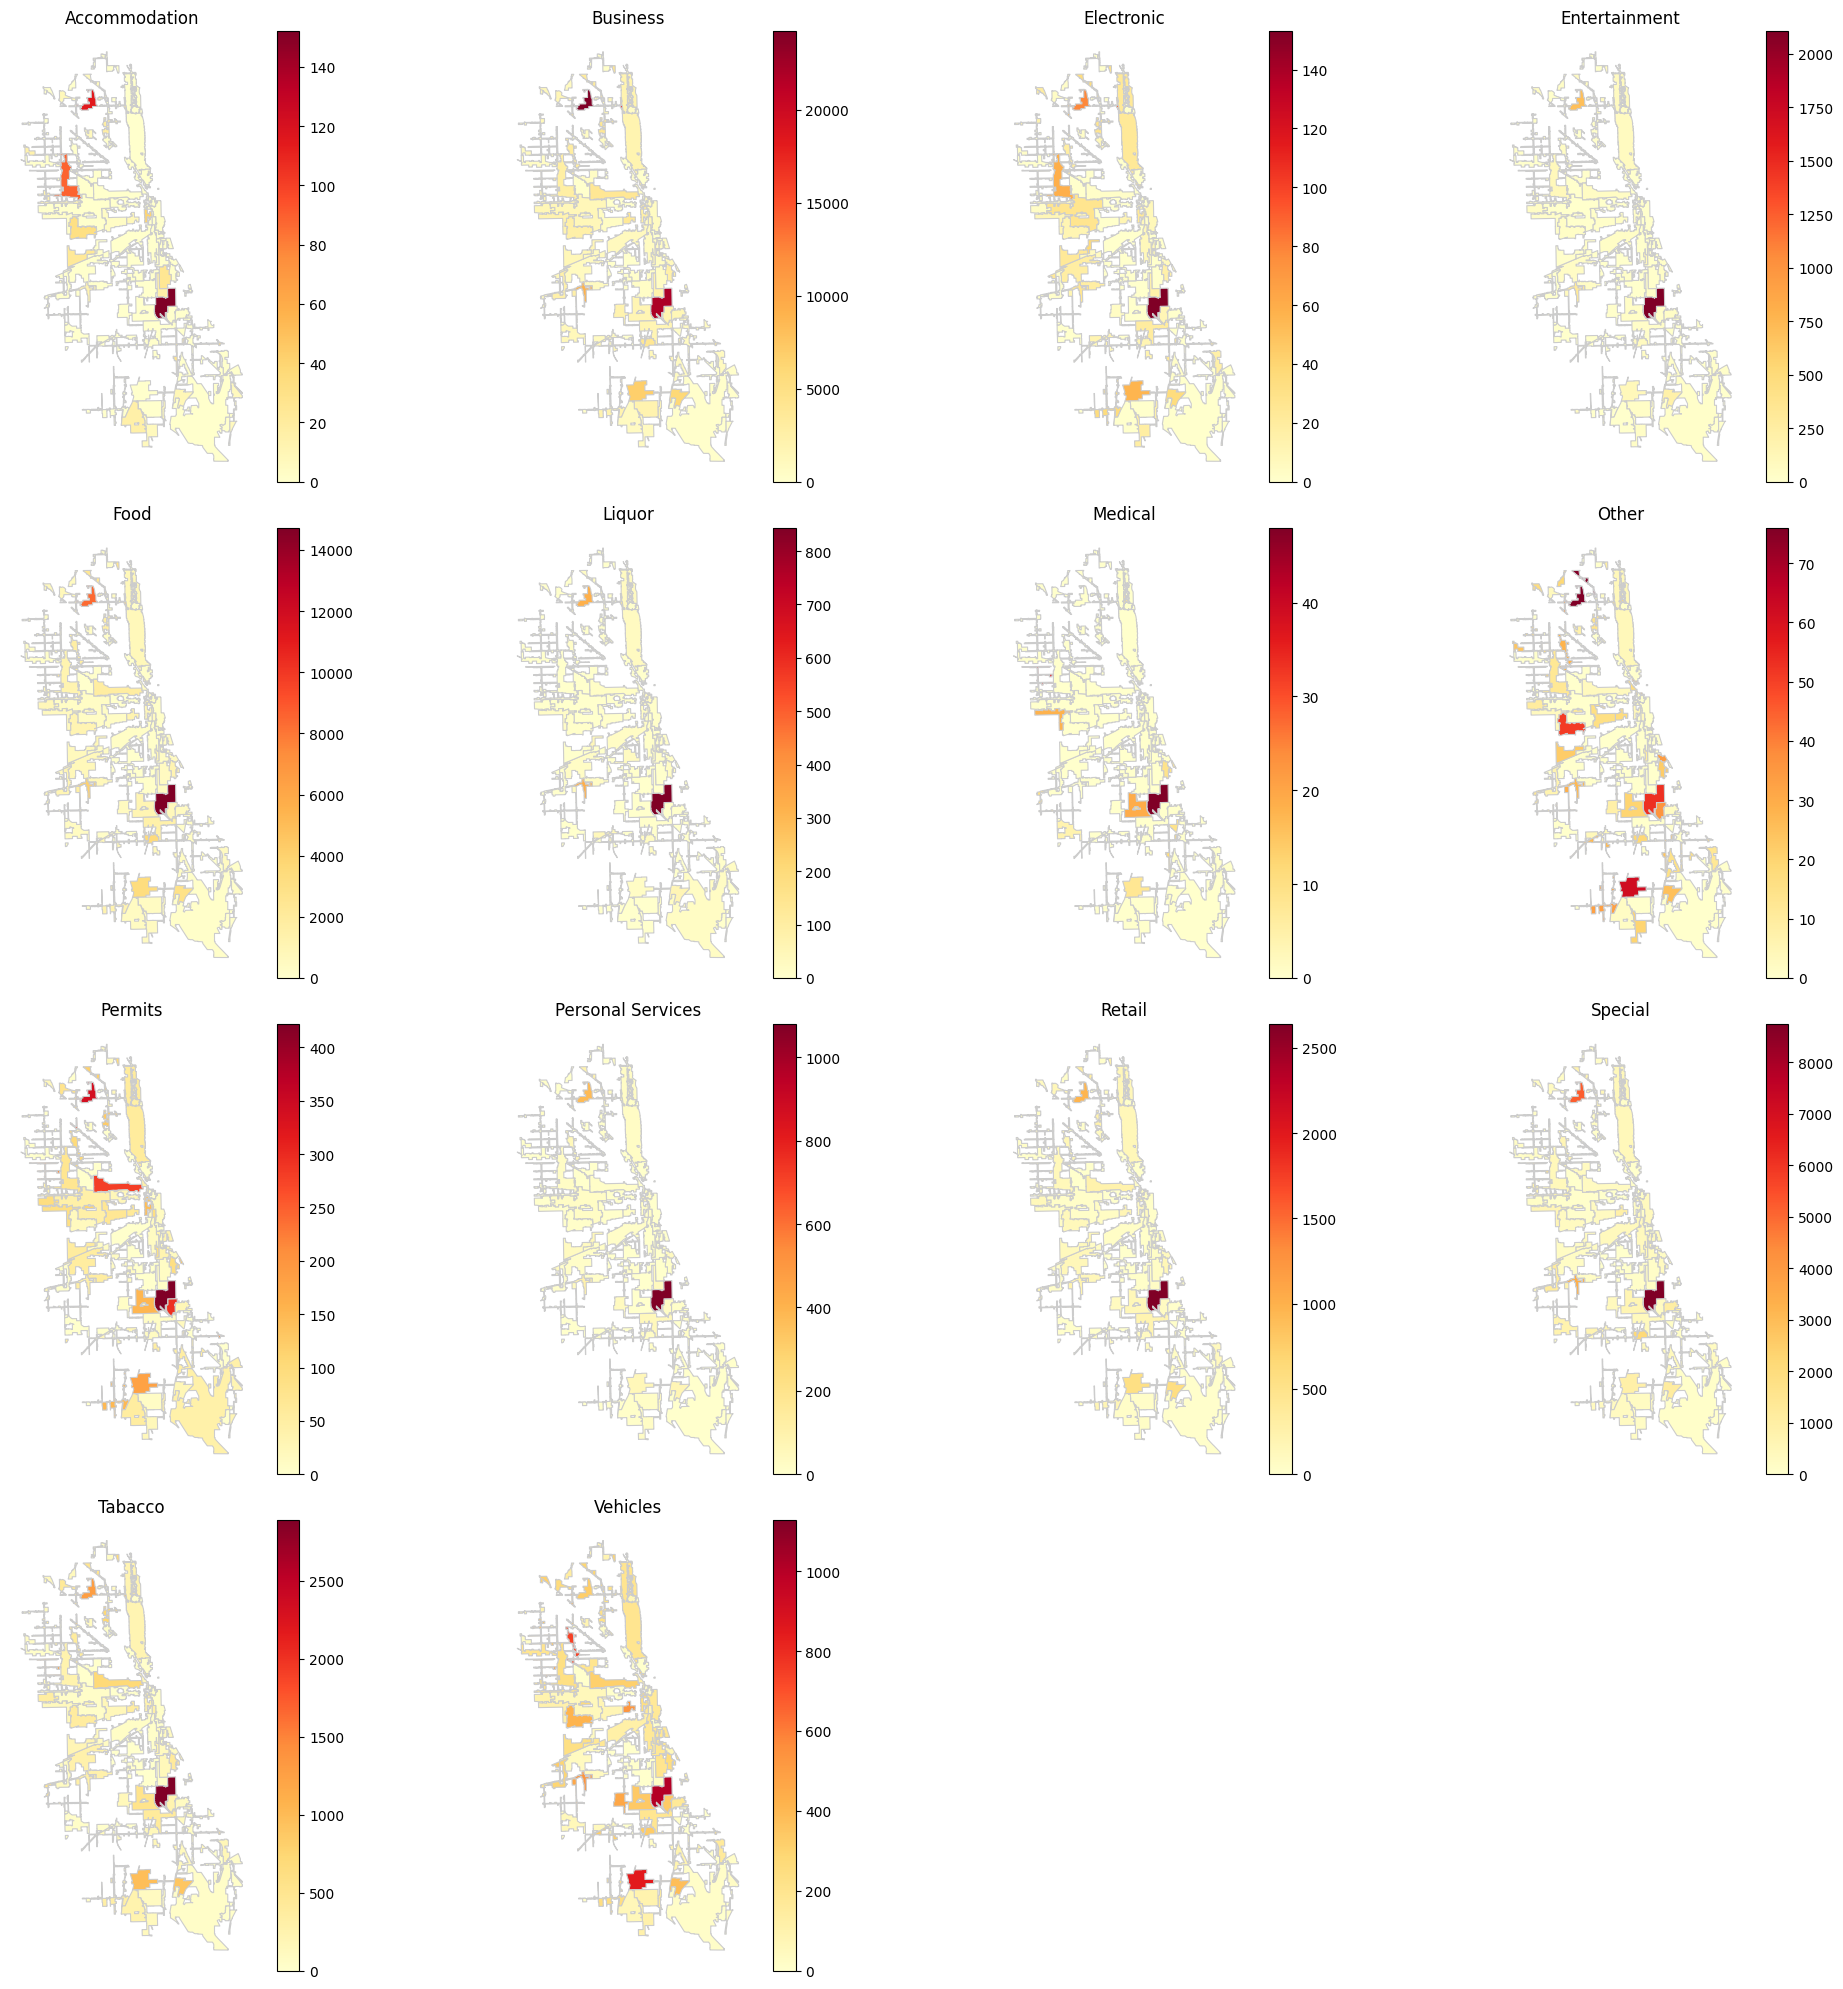

In [7]:


# Assuming 'tif_geo' is your GeoDataFrame

# List of columns to plot
columns = ['Accommodation', 'Business', 'Electronic', 'Entertainment', 'Food', 
           'Liquor', 'Medical', 'Other', 'Permits', 'Personal Services', 
           'Retail', 'Special', 'Tabacco', 'Vehicles']

# Calculate the number of rows and columns for the subplot grid
n_cols = 4
n_rows = int(len(columns) / n_cols) + (1 if len(columns) % n_cols else 0)

# Create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each column and plot
for i, column in enumerate(columns):
    tif_geo.plot(column=column, cmap='YlOrRd', linewidth=0.8, ax=axs[i], edgecolor='0.8', legend=True)
    axs[i].set_title(column)
    axs[i].set_axis_off()

# Hide any unused subplots
for ax in axs[len(columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


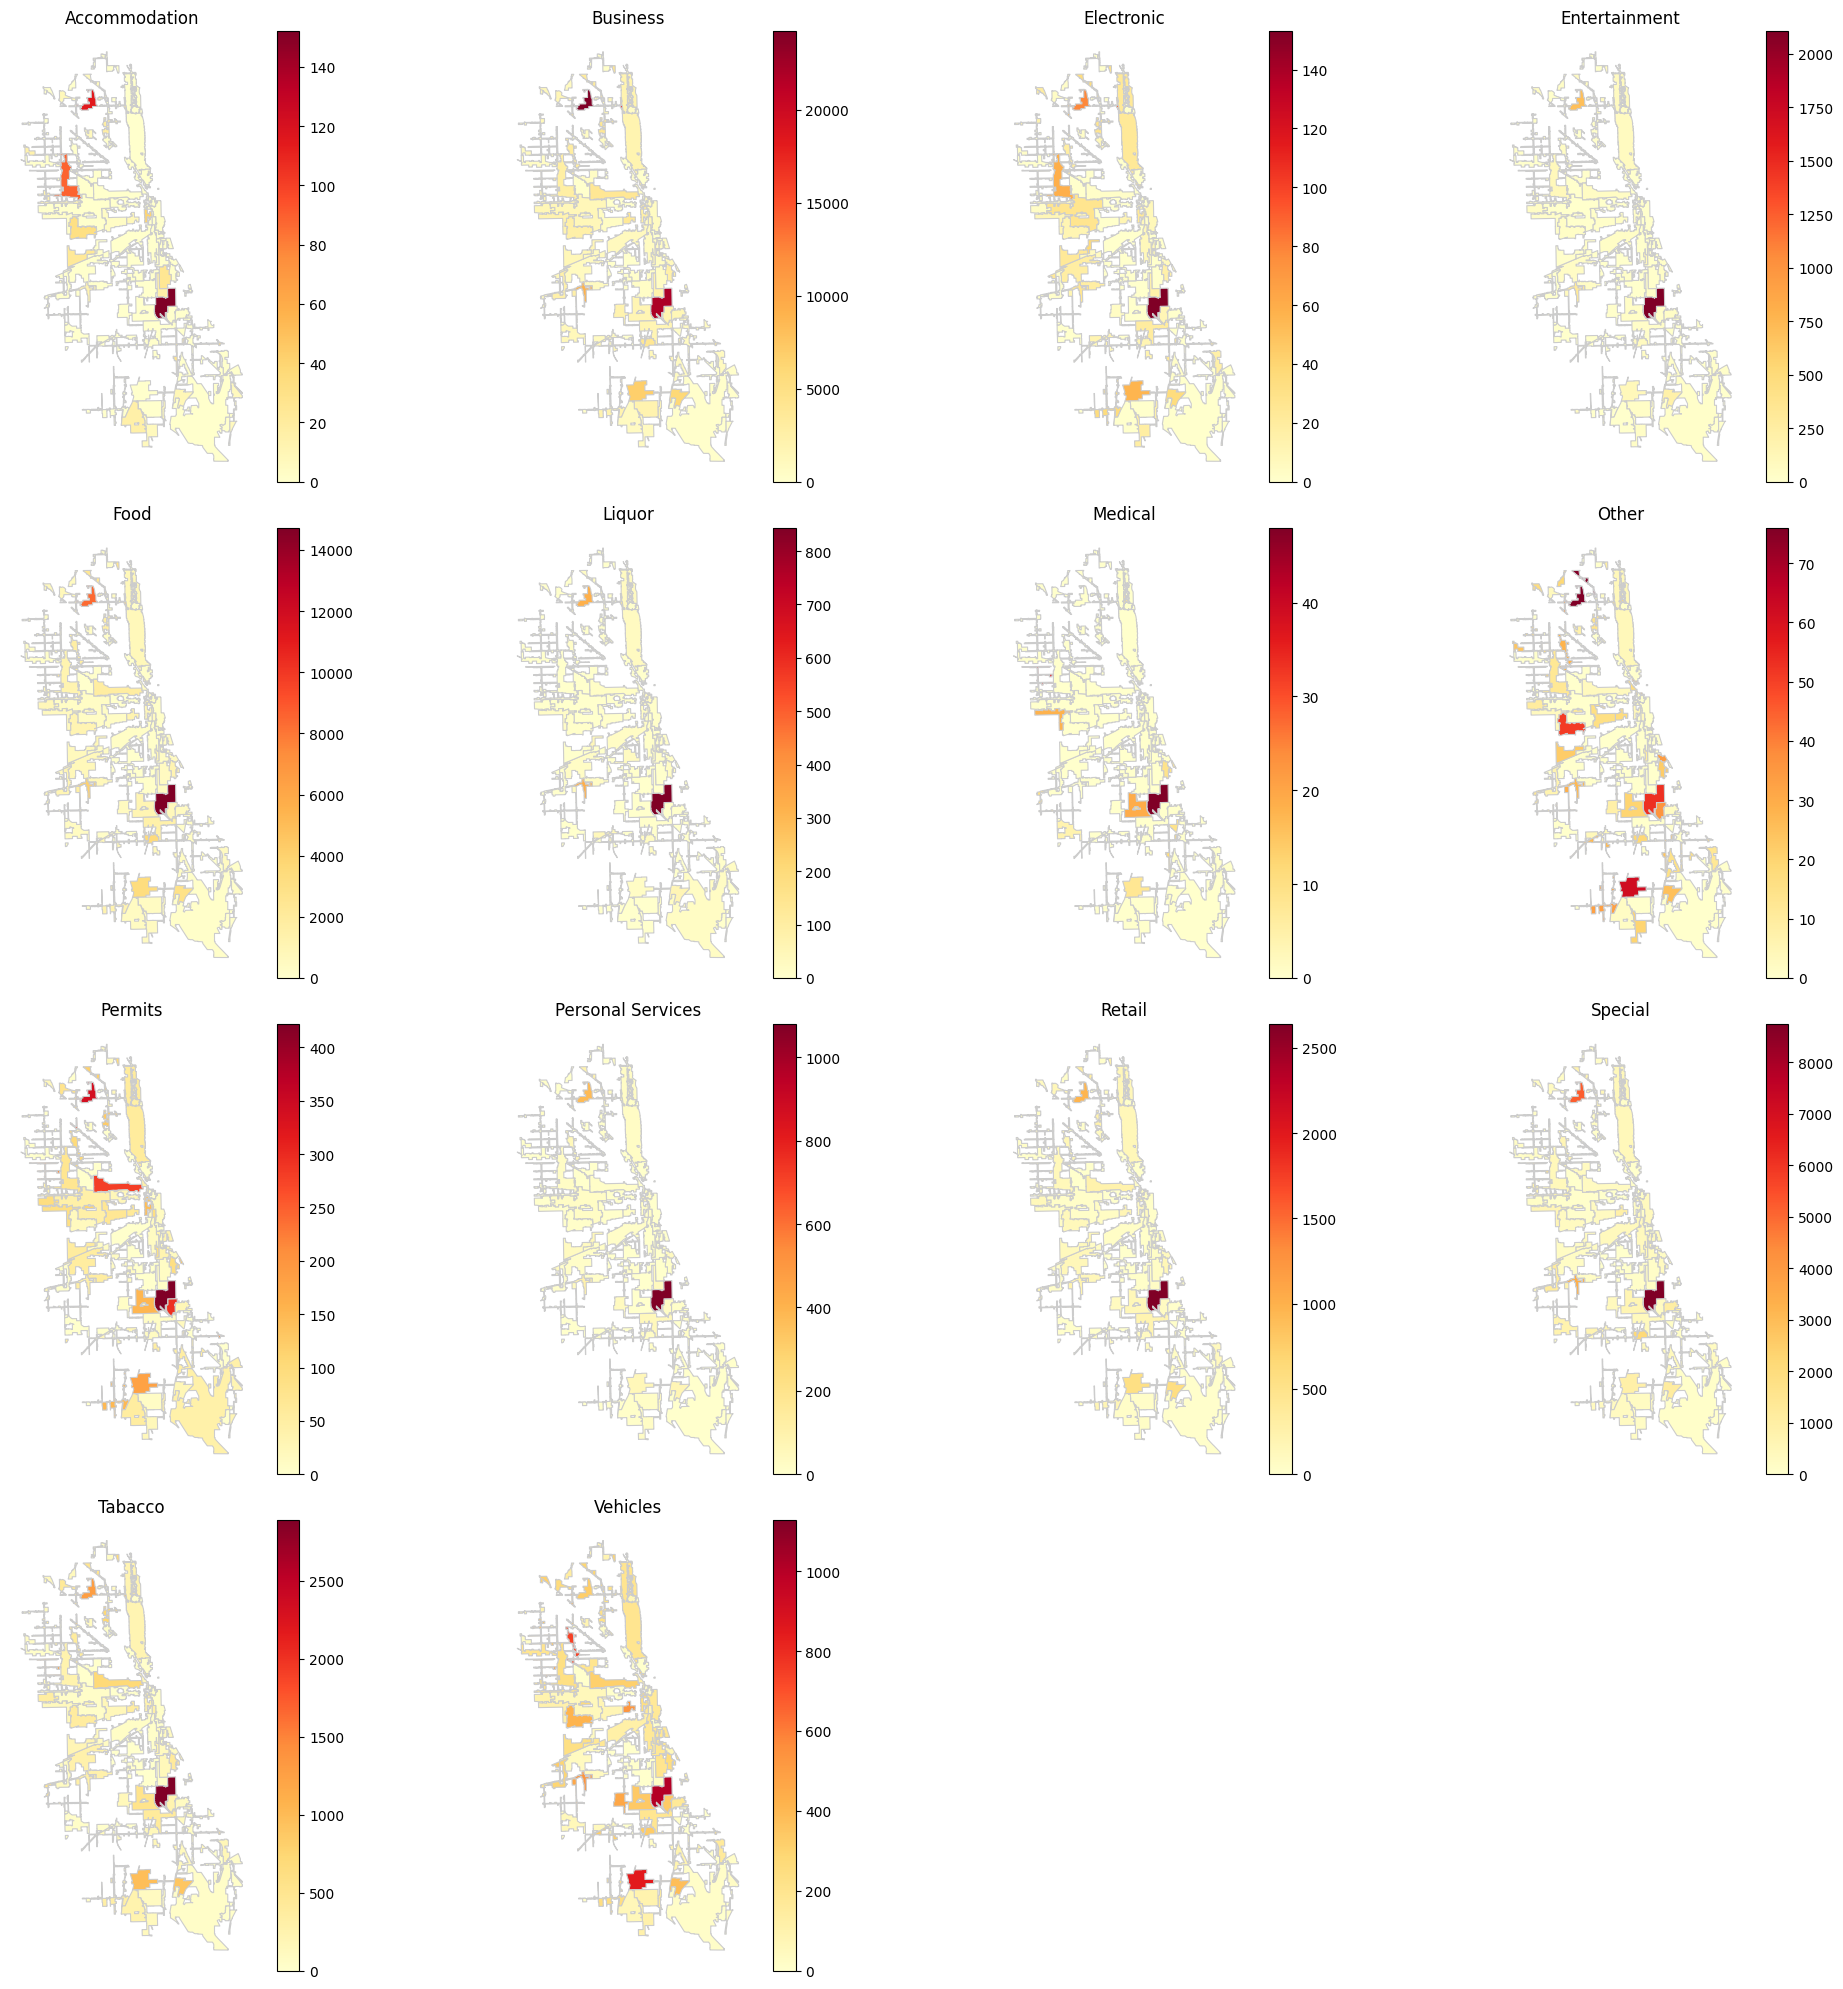

In [8]:
columns = ['Accommodation', 'Business', 'Electronic', 'Entertainment', 'Food', 
           'Liquor', 'Medical', 'Other', 'Permits', 'Personal Services', 
           'Retail', 'Special', 'Tabacco', 'Vehicles']

# Calculate the number of rows and columns for the subplot grid
n_cols = 4
n_rows = int(len(columns) / n_cols) + (1 if len(columns) % n_cols else 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axs = axs.flatten()

# Loop through each column and plot
for i, column in enumerate(columns):
    tif_geo.plot(column=column, cmap='YlOrRd', linewidth=0.8, ax=axs[i], edgecolor='0.8', legend=True)
    axs[i].set_title(column)
    axs[i].set_axis_off()

# Hide any unused subplots
for ax in axs[len(columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>